In [ ]:
import pandas as pd
from tensorflow import keras

# Load your real-time data
real_time_data_path = '/content/preprocessed_traffic.csv'
df = pd.read_csv(real_time_data_path)
print(df.head())

# Select the specific columns that the model was trained on
X = df[['Src Port', 'Dst Port', 'Total Fwd Packet', 'Total Bwd packets',
        'Fwd Header Length', 'Bwd Header Length', 'Fwd Packets/s',
        'Bwd Packets/s', 'ACK Flag Count', 'FWD Init Win Bytes',
        'Bwd Init Win Bytes', 'Protocol', 'Flow Duration',
        'Total Length of Fwd Packet', 'Total Length of Bwd Packet',
        'Fwd Packet Length Max', 'Fwd Packet Length Min',
        'Fwd Packet Length Mean', 'Fwd Packet Length Std',
        'Bwd Packet Length Max', 'Bwd Packet Length Min',
        'Bwd Packet Length Mean', 'Bwd Packet Length Std',
        'Flow Packets/s', 'Flow IAT Mean']]

# Assuming that the data needs to be normalized or scaled as it was during model training
# (You should replace this with the actual preprocessing used during model training)

# Load the trained model
model_path = '/content/Darknet_Network_Traffic_Prediction_20240410_145119.h5'
model = keras.models.load_model(model_path)

# Perform predictions with the preprocessed real-time data
predictions = model.predict(X)

# Process the predictions as needed, e.g., convert to classes if it's a classification model
# ...

# Print the predictions
print(predictions)


   No.      Time          Source   Destination  Protocol  Length  \
0    1  0.000000    192.168.1.25  168.95.246.4       1.0      58   
1    2  0.084645    168.95.246.4  192.168.1.25       1.0      58   
2    3  1.085875    192.168.1.25  168.95.246.4       1.0      58   
3    4  1.174424    168.95.246.4  192.168.1.25       1.0      58   
4    5  1.350910  23.220.188.250  192.168.1.25       NaN      85   

                                                Info  Src Port    TTL  \
0  Echo (ping) request  id=0x0002, seq=32692/4620...   32692.0  255.0   
1  Echo (ping) reply    id=0x0002, seq=32692/4620...   32692.0   41.0   
2  Echo (ping) request  id=0x0002, seq=32693/4646...   32693.0  255.0   
3  Echo (ping) reply    id=0x0002, seq=32693/4646...   32693.0   41.0   
4                                    Encrypted Alert       NaN    NaN   

   Dst Port  ...  Fwd Packet Length Max  Fwd Packet Length Min  \
0         0  ...                      0                      0   
1         0  ...    

In [ ]:
import numpy as np

# Assuming 'predictions' contains the output from the model
# Since it's a binary classification, we'll consider probabilities >= 0.5 as indicating darknet traffic

# Apply threshold to prediction probabilities to get binary outcomes
threshold = 0.86
predicted_classes = (predictions >= threshold).astype(int)

# If you need to map these to labels
labels = ['No Darknet', 'Darknet']
predicted_labels = [labels[i] for i in predicted_classes.flatten()]

print(predicted_labels)


['No Darknet', 'Darknet', 'No Darknet', 'No Darknet', 'No Darknet', 'Darknet', 'No Darknet', 'No Darknet', 'No Darknet', 'Darknet', 'No Darknet', 'No Darknet', 'No Darknet', 'Darknet', 'No Darknet', 'No Darknet', 'No Darknet', 'No Darknet', 'No Darknet', 'No Darknet', 'No Darknet', 'No Darknet', 'No Darknet', 'No Darknet', 'No Darknet', 'No Darknet', 'No Darknet', 'No Darknet', 'No Darknet', 'No Darknet', 'No Darknet', 'No Darknet', 'No Darknet', 'No Darknet', 'No Darknet', 'No Darknet', 'No Darknet', 'No Darknet', 'No Darknet', 'No Darknet', 'No Darknet', 'No Darknet', 'No Darknet', 'No Darknet', 'No Darknet', 'Darknet', 'No Darknet', 'No Darknet', 'No Darknet', 'Darknet', 'No Darknet', 'No Darknet', 'No Darknet', 'Darknet', 'No Darknet', 'No Darknet', 'No Darknet', 'Darknet', 'No Darknet', 'No Darknet', 'No Darknet', 'No Darknet', 'No Darknet', 'No Darknet', 'No Darknet', 'No Darknet', 'No Darknet', 'No Darknet', 'No Darknet', 'No Darknet', 'No Darknet', 'No Darknet', 'No Darknet', '

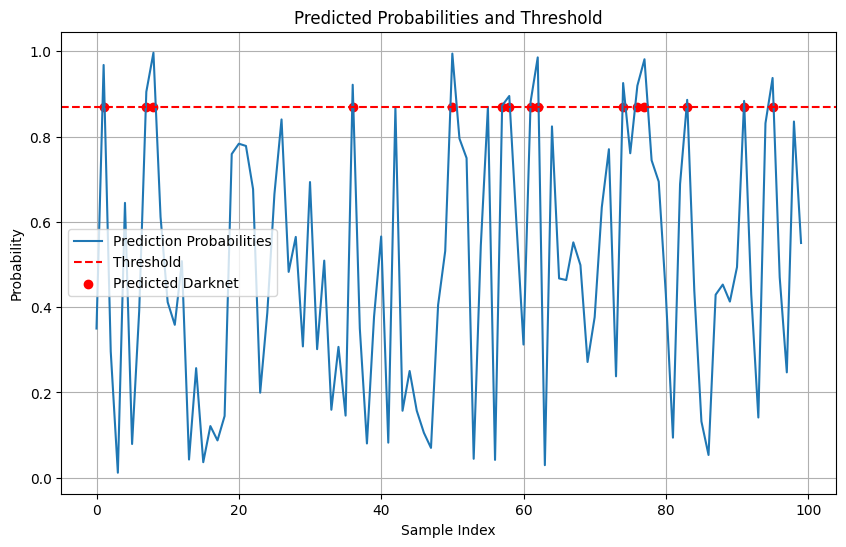

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Generate some example data (replace this with your actual predictions)
predictions = np.random.rand(100)

# Assuming 'predictions' contains the output from the model
# Since it's a binary classification, we'll consider probabilities >= 0.5 as indicating darknet traffic

# Apply threshold to prediction probabilities to get binary outcomes
threshold = 0.87
predicted_classes = (predictions >= threshold).astype(int)

# If you need to map these to labels
labels = ['No Darknet', 'Darknet']
predicted_labels = [labels[i] for i in predicted_classes.flatten()]

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(predictions, label='Prediction Probabilities')
plt.axhline(y=threshold, color='r', linestyle='--', label='Threshold')
plt.scatter(np.where(predicted_classes == 1), np.ones_like(np.where(predicted_classes == 1)) * threshold, color='red', label='Predicted Darknet')
plt.xlabel('Sample Index')
plt.ylabel('Probability')
plt.title('Predicted Probabilities and Threshold')
plt.legend()
plt.grid(True)
plt.show()


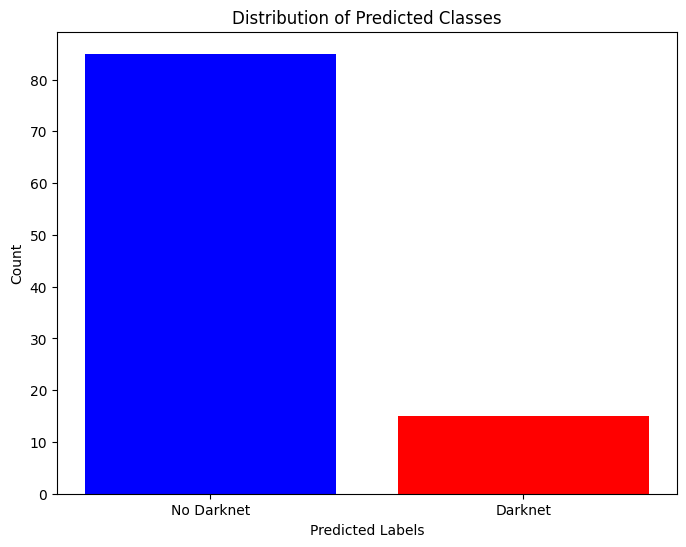

In [ ]:
import matplotlib.pyplot as plt

# Assuming 'predicted_labels' contains the predicted labels
# Count occurrences of each label
label_counts = {label: predicted_labels.count(label) for label in labels}

# Plotting
plt.figure(figsize=(8, 6))
plt.bar(label_counts.keys(), label_counts.values(), color=['blue', 'red'])
plt.xlabel('Predicted Labels')
plt.ylabel('Count')
plt.title('Distribution of Predicted Classes')
plt.show()


In [ ]:
import numpy as np

# Perform predictions with the LSTM model
predictions = model.predict(X)

# Convert probabilities to class indices
predicted_class_indices = np.argmax(predictions, axis=1)

# If you have a LabelEncoder or a list that was used to encode the subtype classes during training
# You would use it here to transform indices back to original class names
# For demonstration purposes, let's assume you have a label encoder
from sklearn.preprocessing import LabelEncoder

# Assuming you have saved your label encoder after fitting it to your subtypes
# and you have loaded it back
label_encoder = LabelEncoder()
label_encoder.classes_ = np.array(['Browsing', 'Data-Transfer', 'P2P', 'Streaming'])  # Replace with actual array used

# Convert class indices back to class names
predicted_class_names = label_encoder.inverse_transform(predicted_class_indices)

# Display the predicted class names
print(predicted_class_names)


20/20 [==============================] - 1s 59ms/step
['Data-Transfer' 'Data-Transfer' 'Data-Transfer' 'Data-Transfer'
 'Browsing' 'Browsing' 'Browsing' 'Browsing' 'Browsing' 'Browsing'
 'Browsing' 'Data-Transfer' 'Data-Transfer' 'Data-Transfer'
 'Data-Transfer' 'Browsing' 'Browsing' 'Browsing' 'Browsing' 'Browsing'
 'Browsing' 'Browsing' 'Browsing' 'Browsing' 'Browsing' 'Browsing'
 'Browsing' 'Data-Transfer' 'Browsing' 'Browsing' 'Browsing'
 'Data-Transfer' 'Browsing' 'Browsing' 'Browsing' 'Browsing' 'Browsing'
 'Browsing' 'Browsing' 'Browsing' 'Browsing' 'Browsing' 'Browsing'
 'Browsing' 'Data-Transfer' 'Browsing' 'Browsing' 'Browsing'
 'Data-Transfer' 'Browsing' 'Browsing' 'Browsing' 'Browsing' 'Browsing'
 'Browsing' 'Browsing' 'Browsing' 'Browsing' 'Browsing' 'Browsing'
 'Browsing' 'Browsing' 'Browsing' 'Browsing' 'Browsing' 'Data-Transfer'
 'Browsing' 'Browsing' 'Browsing' 'Browsing' 'Browsing' 'Browsing'
 'Data-Transfer' 'Browsing' 'Browsing' 'Browsing' 'Browsing' 'Browsing'
 'Br